In [ ]:
PRODUCT_NAME = ['财富26', '财富26权重', '建信整体','建信整体权重', 'FOF1', 'FOF1权重', 'FOF2', 'FOF2权重', 'FOF3',\
                'FOF3权重','善建FOF1号', '善建FOF1号权重', '善建FOF2号', '善建FOF2号权重', '财富35', '财富35权重',\
                '财富38', '财富38权重', '海蓝1号', '海蓝1号权重', '海蓝2号', '海蓝2号权重', '再融资2号','再融资2号权重', \
                '定增精选1期', '定增精选1期权重', '臻享2号', '臻享2号权重', '臻享3号', '臻享3号权重','再融资8号', \
                '再融资8号权重', '多空1号', '多空1号权重', '盛世3期', '盛世3期权重', '再融资1号', '再融资1号权重', '财富42',\
                '财富42权重','再融资6号', '再融资6号权重', '盛世4期', '盛世4期权重', '盛世5期', '盛世5期权重', '鸣森1号',\
                '鸣森1号权重', '再融资5号', '再融资5号权重', '臻享1号', '臻享1号权重', '臻享6号', '臻享6号权重']
PRODUCT_NAME = sorted([name for name in PRODUCT_NAME if not name.endswith('权重')])

In [ ]:
import pandas as pd
market_data = pd.read_csv('market_data.csv')
product_data = pd.read_csv('product_data.csv')
from datetime import datetime as dt
tmp = pd.to_datetime(product_data['解禁日期'])-pd.to_datetime(product_data['发行日期'])
product_data['持有天数'] = tmp.apply(lambda x:x.days)
product_data['年化收益'] = product_data['解禁日收益率']*365/product_data['持有天数']
product_data.to_csv('product_data.csv', index=False)

market_data.dropna(inplace=True, subset=['首批限售股份解禁日'])
tmp = pd.to_datetime(market_data['首批限售股份解禁日'])-pd.to_datetime(market_data['发行日期'])
market_data['持有天数'] = tmp.apply(lambda x:x.days)
market_data['年化收益'] = (market_data['解禁日浮盈'].apply(lambda x:float(x[:-1])/100))*365/market_data['持有天数']
market_data.to_csv('market_data.csv', index=False)

# 验证2020前后数据是否存在飘移

In [ ]:
import pandas as pd
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')

In [ ]:
train_data.columns

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np

In [ ]:
KL = []
bins = np.arange(-2,2.2,0.2)
for c in train_data.describe().columns:
    p = train_data[c]
    tmp = pd.cut(x = p, bins = bins, include_lowest = False)
    p = (p.groupby(tmp).count()/100).values
    q = test_data[c]
    tmp = pd.cut(x = q, bins = bins, include_lowest = False)
    q = (q.groupby(tmp).count()/100).values      
    KL.append((c,scipy.stats.entropy(q, p)))
KL

In [ ]:
c = '年化收益'
ax = plt.subplot(1,2,1)
ax = plt.hist(train_data[c], bins=20, range=(-2,2), density=True)
plt.title('train data dist')
ax = plt.subplot(1,2,2)
ax = plt.hist(test_data[c], bins=20, range=(-2,2), density=True)
plt.title('test data dist')

### 结合KL散度和作图分析看折扣率、发行价格、研发营收比、毛利率3、股价分布变化较大

# 不同类样本分布对比

In [ ]:
import pandas as pd
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')
train_data['盈利']= train_data['年化收益'].apply(lambda x : 1 if x > 0 else 0)
test_data['盈利']= test_data['年化收益'].apply(lambda x : 1 if x > 0 else 0)
train_data['月份'] = train_data['发行月份'].transform(lambda x:x[-2:])
test_data['月份'] = test_data['发行月份'].transform(lambda x:x[-2:])
data = pd.concat([train_data, test_data], axis=0)
data['月份'] = data['发行月份'].transform(lambda x:x[-2:])

In [ ]:
test_data.groupby('大股东是否跟投').describe()['年化收益']

### 结论：大股东跟投和月份与年化收益分布有关

# 产品与市场数据分布对比

In [ ]:
import pandas as pd
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')
train_data['盈利']= train_data['年化收益'].apply(lambda x : 1 if x > 0 else 0)
test_data['盈利']= test_data['年化收益'].apply(lambda x : 1 if x > 0 else 0)
train_data['月份'] = train_data['发行月份'].transform(lambda x:x[-2:])
test_data['月份'] = test_data['发行月份'].transform(lambda x:x[-2:])
data = pd.concat([train_data, test_data], axis=0)
data['月份'] = data['发行月份'].transform(lambda x:x[-2:])
product_data = pd.read_csv('product_data.csv')
products = product_data[['代码', '发行日期']].copy()

In [ ]:
a = data.merge(products, how='inner', on=['代码', '发行日期'])
print(product_data.shape)
print(data.shape)
print(a.shape)

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np

In [ ]:
KL = []
bins = np.arange(-2,2.2,0.2)
for c in a.describe().columns:
    p = a[c]
    tmp = pd.cut(x = p, bins = bins, include_lowest = False)
    p = (p.groupby(tmp).count()/100).values
    q = data[c]
    tmp = pd.cut(x = q, bins = bins, include_lowest = False)
    q = (q.groupby(tmp).count()/100).values      
    KL.append((c,scipy.stats.entropy(p, q)))
sorted(KL, key=lambda x:x[1], reverse=True)

In [ ]:
c = '净利润增速'
ax = plt.subplot(1,2,1)
ax = plt.hist(data[c], bins=20, range=(-2,2), density=True)
plt.title('data dist')
ax = plt.subplot(1,2,2)
ax = plt.hist(a[c], bins=20, range=(-2,2), density=True)
plt.title('product dist')

# 股票自动选择与权重计算

In [1]:
from datetime import datetime as dt
import datetime
import bisect
import pandas as pd
import joblib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import r2_score, accuracy_score, recall_score, mean_squared_error
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC, LinearSVR, NuSVC, NuSVR
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# 实现打分表逻辑


## 分类方法

In [ ]:
factor = ['发行价格', '预计募资', '折扣率', '总市值', '增发占增发后自由流通市值',\
          '发行前20日股价涨跌幅', '行业20日涨跌幅', '发行前20日相对行业涨跌幅', '股价', '基金占比',\
          '前次占比', '换手率', '闪发', '净利FY0', '净利FY1', '净利FY2', '未来1年净利润增速', \
          '未来2年净利润增速', 'PS百分位', 'PE百分位', '总资产增速1', '总资产增速2', '总资产增速3',\
          '货币资金/有息负债1','货币资金/有息负债2', '货币资金/有息负债3', '固定资产周转率', '经营性现金流净额/净利润', \
          '净利润增速', '净资产增速', '经营性现金流增速', '现金收入比', '存货周转率', '经营杠杆系数', \
          '财务杠杆系数', '经营活动产生的现金流净额/营业收入', '投入资本回报率1', '投入资本回报率2', '投入资本回报率3',\
          '研发营收比', '毛利率1', '毛利率2', '毛利率3', '毛利率波动性', '毛利率变异系数', '成立年数', '上市年数',\
          '经营层持股比例', '机构持股比例', '资产专用度', 'ROE1', 'ROE2', 'ROE3', 'ROE波动率',\
          '营业收入/长期资本', '经营资产占比', '期间费用率','所属行业','增发目的', '大股东是否跟投','月份']
class_factor = ['所属行业','增发目的', '大股东是否跟投','月份']
# 根据相关性排名选出的不重要因子
abandon = ['换手率', '毛利率2', '闪发', '固定资产周转率', '货币资金/有息负债2','毛利率变异系数','经营层持股比例','经营杠杆系数',
           '资产专用度','毛利率波动性','ROE2','未来2年净利润增速','毛利率1','经营资产占比','投入资本回报率2']
for f in abandon:
    factor.remove(f)
test_data = pd.read_csv(dir_path+'test_data.csv')
test_data.drop_duplicates(inplace=True)
train_data = pd.read_csv(dir_path+'train_data.csv')
train_data.drop_duplicates(inplace=True)
train_data['月份'] = train_data['发行月份'].apply(lambda x:x[-2:])
test_data['月份'] = test_data['发行月份'].apply(lambda x:x[-2:])
train_data.drop(columns=['发行月份'], inplace=True)
test_data.drop(columns=['发行月份'], inplace=True)
for f in class_factor:
    train_data[f] = train_data[f].astype('category')
    test_data[f] = test_data[f].astype('category')
train_data['盈利']= train_data['年化收益'].apply(lambda x : 1 if x > 0 else 0)
test_data['盈利']= test_data['年化收益'].apply(lambda x : 1 if x > 0 else 0)
target = '盈利'
# PCA
'''
pca = PCA(n_components='mle')
pca.fit(train_data[factor[:-4]].values)
tr = pca.transform(train_data[factor[:-4]].values)
tr = pd.DataFrame(tr, index=train_data.index)
train_data = pd.concat([train_data[[target]+class_factor], tr], axis=1)
te = pca.transform(test_data[factor[:-4]].values)
te = pd.DataFrame(te, index=test_data.index)
test_data = pd.concat([test_data[[target]+class_factor], te], axis=1)
'''
X_nontest = train_data[factor]
X_test = test_data[factor]
y_nontest = train_data[target]
y_test = test_data[target]

X_train, X_valid, y_train, y_valid = train_test_split(X_nontest, y_nontest, test_size=0.1, random_state=6)

In [ ]:
# 负样本权重2， 正样本权重1
train_weight = np.ones(y_train.shape)
train_weight[np.where(y_train.values == 0)] = 0.9
valid_weight = np.ones(y_valid.shape)
valid_weight[np.where(y_valid.values == 0)] = 0.9
train_data = lgb.Dataset(X_train, label=y_train, weight=train_weight, categorical_feature=class_factor)
valid_data = lgb.Dataset(X_valid, label=y_valid, weight=valid_weight, categorical_feature=class_factor)
params={'task':'train',
        'objective':'binary',
        'boosting':'gbdt', 
        'max_depth':6, 
        'learning_rate':0.08,
        'feature_fraction':0.9,
        'top_rate':0.1,
        'other_rate':0.1,
        'cat_smooth':10,
        'verbosity':-1,
        'metric':['binary_logloss'],
       }
lgbclf = lgb.train(params, train_set=train_data,valid_sets=[valid_data],
                   num_boost_round=200, early_stopping_rounds=50)

In [ ]:
y_pred_prob = lgbclf.predict(X_nontest)
y_pred = np.ones(y_pred_prob.shape)
y_pred[np.where(y_pred_prob<0.5)]=0
y_label = y_nontest.values
print('train accuracy:', accuracy_score(y_label, y_pred))
print('train recall:', recall_score(y_label, y_pred))
y_pred_prob = lgbclf.predict(X_valid)
y_pred = np.ones(y_pred_prob.shape)
y_pred[np.where(y_pred_prob<0.5)]=0
y_label = y_valid.values
print('valid accuracy:', accuracy_score(y_label, y_pred))
print('valid recall:', recall_score(y_label, y_pred))
y_pred_prob = lgbclf.predict(X_test)
y_pred = np.ones(y_pred_prob.shape)
y_pred[np.where(y_pred_prob<0.5)]=0
y_label = y_test.values
print('test accuracy:', accuracy_score(y_label, y_pred))
print('test recall:', recall_score(y_label, y_pred))

In [ ]:
importance_rank = list(zip(factor,lgbclf.feature_importance()))
importance_rank.sort(key=lambda x:x[1])
importance_rank

In [ ]:
# 非测试集相关性
train_data = pd.read_csv(dir_path+'train_data.csv')
x = train_data.corr(method='spearman')['年化收益'].apply(np.abs).sort_values(ascending=False)
x.index

## 回归方法

In [ ]:
factor = ['发行价格', '预计募资', '折扣率', '总市值', '增发占增发后自由流通市值',\
          '发行前20日股价涨跌幅', '行业20日涨跌幅', '发行前20日相对行业涨跌幅', '股价', '基金占比',\
          '前次占比', '换手率', '闪发', '净利FY0', '净利FY1', '净利FY2', '未来1年净利润增速', \
          '未来2年净利润增速', 'PS百分位', 'PE百分位', '总资产增速1', '总资产增速2', '总资产增速3',\
          '货币资金/有息负债1','货币资金/有息负债2', '货币资金/有息负债3', '固定资产周转率', '经营性现金流净额/净利润', \
          '净利润增速', '净资产增速', '经营性现金流增速', '现金收入比', '存货周转率', '经营杠杆系数', \
          '财务杠杆系数', '经营活动产生的现金流净额/营业收入', '投入资本回报率1', '投入资本回报率2', '投入资本回报率3',\
          '研发营收比', '毛利率1', '毛利率2', '毛利率3', '毛利率波动性', '毛利率变异系数', '成立年数', '上市年数',\
          '经营层持股比例', '机构持股比例', '资产专用度', 'ROE1', 'ROE2', 'ROE3', 'ROE波动率',\
          '营业收入/长期资本', '经营资产占比', '期间费用率','所属行业','发行对象','增发目的','盈利预测', '大股东是否跟投','月份']
class_factor = ['所属行业','发行对象','增发目的','盈利预测', '大股东是否跟投','月份']
test_data = pd.read_csv(dir_path+'test_data.csv')
test_data.drop_duplicates(inplace=True)
train_data = pd.read_csv(dir_path+'train_data.csv')
train_data.drop_duplicates(inplace=True)
train_data['月份'] = train_data['发行月份'].apply(lambda x:x[-2:])
test_data['月份'] = test_data['发行月份'].apply(lambda x:x[-2:])
train_data.drop(columns=['发行月份'], inplace=True)
test_data.drop(columns=['发行月份'], inplace=True)
for f in class_factor:
    train_data[f] = train_data[f].astype('category')
    test_data[f] = test_data[f].astype('category')
target = '年化收益'
X_nontest = train_data[factor]
X_test = test_data[factor]
y_nontest = train_data[target]
y_test = test_data[target]
X_train, X_valid, y_train, y_valid = train_test_split(X_nontest, y_nontest, test_size=0.1, random_state=6)
# 改变训练数据时期，数据少表现下降
#ratio = 0.9
#num = int(len(X_train)*ratio)
#X_train = X_train.iloc[-num:]
#y_train = y_train.iloc[-num:]
# 样本权重
train_weight = np.ones(y_train.shape)
train_weight[np.where(y_train.values == 0)] = 1
valid_weight = np.ones(y_valid.shape)
valid_weight[np.where(y_valid.values == 0)] = 1
train_data = lgb.Dataset(X_train, label=y_train, weight=train_weight,
                         feature_name=factor, categorical_feature=class_factor)
valid_data = lgb.Dataset(X_valid, label=y_valid, weight=valid_weight,
                         feature_name=factor, categorical_feature=class_factor)

params={'task':'train',
        'objective':'regression',
        'boosting':'goss', 
        'max_depth':6, 
        'learning_rate':0.05,
        'feature_fraction':0.8,
        'top_rate':0.5,
        'other_rate':0.5,
        'cat_smooth':3,
        'verbosity':-1,
        'metric':['l2'],
       }
lgbreg = lgb.train(params, train_set=train_data,valid_sets=[valid_data],
                   num_boost_round=200, early_stopping_rounds=50)

In [ ]:
# 真实1比例56.3%
# train performance
# 最优参数下，训练集准确率80%， 召回率96%
y_pred_prob = lgbreg.predict(X_nontest)
y_pred = np.ones(y_pred_prob.shape)
y_pred[np.where(y_pred_prob<0)]=0
y_label = y_nontest.apply(lambda x:1 if x>0 else 0).values
print('train accuracy:', accuracy_score(y_label, y_pred))
print('train recall:', recall_score(y_label, y_pred))

In [ ]:
# valid performance
# 最优参数下，训练集准确率65%， 召回率89%
y_pred_prob = lgbreg.predict(X_valid)
y_pred = np.ones(y_pred_prob.shape)
y_pred[np.where(y_pred_prob<0)]=0
y_label = y_valid.apply(lambda x:1 if x>0 else 0).values
print('train accuracy:', accuracy_score(y_label, y_pred))
print('train recall:', recall_score(y_label, y_pred))

In [ ]:
y_pred.sum()/y_pred.shape[0]

In [ ]:
# test performance
# 最优参数下，训练集准确率57%， 召回率90%
y_pred_prob = lgbreg.predict(X_test)
print(y_pred_prob)
y_pred = np.ones(y_pred_prob.shape)
y_pred[np.where(y_pred_prob<0)]=0
y_label = y_test.apply(lambda x:1 if x>0 else 0).values
print('train accuracy:', accuracy_score(y_label, y_pred))
print('train recall:', recall_score(y_label, y_pred))

### 若以2020后数据为训练集，则训练表现优于以2020前数据，因此当前因子不足以学习2020前数据信息。

In [85]:
def lgbpredict(dir_path, num_factor=-1, read_pred=False, reg=False):
    '''
    使用LightGBM模型基于2020年前数据对2020年后股票盈利概率计算
    
    
    params:
    
    dir_path: string 数据所在路径，含最后一个斜杠，文件夹中包括train_data.csv和test_data.csv两个清洗好的2020前数据和2020后数据
    num_factor: int 考虑的因子数量，-1使用所有因子
    read_pred：bool 读取预测结果
    reg: bool 使用回归还是二分类
    
    return:
    
    Tuple 包括训练、验证和预测集准确率，训练、验证和预测集召回率
    '''
    if read_pred:
        if reg:
            train_pred = pd.read_csv('train_reg_pred.csv')
            test_pred = pd.read_csv('test_reg_pred.csv')
        else:
            train_pred = pd.read_csv('train_clf_pred.csv')
            test_pred = pd.read_csv('test_clf_pred.csv')
    else:
        # 按lightGBM重要性递减排序
        factor1 = ['折扣率', '股价', '前次占比', '增发占增发后自由流通市值', '总市值', '行业20日涨跌幅', 'PE百分位', '所属行业',\
                  '发行前20日相对行业涨跌幅', '换手率', 'PS百分位', '总资产增速1', '基金占比', '机构持股比例', '财务杠杆系数', \
                  '经营性现金流增速', '闪发', '总资产增速3', '净利润增速', '毛利率波动性', '成立年数', '上市年数', '净利FY2', \
                  '固定资产周转率', '存货周转率', '经营杠杆系数', 'ROE波动率', '预计募资', '经营资产占比', '发行价格', \
                  '未来1年净利润增速', '投入资本回报率1', '投入资本回报率2', '毛利率3', '总资产增速2', '经营性现金流净额/净利润', \
                  '现金收入比', '经营层持股比例', '期间费用率', '未来2年净利润增速', '货币资金/有息负债3', '净资产增速', 'ROE3', \
                  '发行前20日股价涨跌幅', '净利FY1', '资产专用度', 'ROE2', '营业收入/长期资本', '货币资金/有息负债2', \
                  '投入资本回报率3', '毛利率1', 'ROE1', '货币资金/有息负债1', '研发营收比', '毛利率2', '毛利率变异系数', \
                  '净利FY0', '经营活动产生的现金流净额/营业收入', '增发目的', '大股东是否跟投', '月份']
        # 按相关性递减排序
        factor2 = ['股价', '折扣率', '前次占比', '总市值','发行价格', '增发占增发后自由流通市值', 'PS百分位', '基金占比', \
                  '持有天数', '净利FY0', '总资产增速3','净利润增速', '净利FY2', '总资产增速1', '净资产增速', 'PE百分位', \
                  '发行前20日股价涨跌幅', '净利FY1','预计募资', '行业20日涨跌幅', 'ROE', 'ROE1', '投入资本回报率1', \
                  'ROE波动率', '研发营收比','发行前20日相对行业涨跌幅', '总资产增速2', '货币资金/有息负债3', '上市年数', \
                  '毛利率3', '存货周转率','成立年数', '经营性现金流净额/净利润', '营业收入/长期资本', '投入资本回报率3', \
                  '经营性现金流增速', 'ROE3','现金收入比', '财务杠杆系数', '经营活动产生的现金流净额/营业收入', \
                  '货币资金/有息负债1', '期间费用率','未来1年净利润增速', '机构持股比例', '投入资本回报率2', '经营资产占比', \
                  '毛利率1', '未来2年净利润增速','ROE2', '毛利率波动性', '资产专用度', '经营杠杆系数', '经营层持股比例', \
                  '毛利率变异系数', '货币资金/有息负债2', '固定资产周转率', '闪发', '毛利率2', '换手率','所属行业', '增发目的', \
                  '大股东是否跟投', '月份']
        factor = factor1
        class_factor = ['所属行业', '增发目的', '大股东是否跟投', '月份']
        if num_factor == -1:
            pass
        else:
            factor = factor[:num_factor]
            class_factor = list(set(factor).intersection(set(class_factor)))
        test_data = pd.read_csv(dir_path+'test_data.csv')
        test_data.drop_duplicates(inplace=True)
        train_data = pd.read_csv(dir_path+'train_data.csv')
        train_data.drop_duplicates(inplace=True)
        #tmp = train_data['折扣率'] 
        #train_data['折扣率'] = (tmp - tmp.mean())/tmp.std()
        #tmp = test_data['折扣率']
        #test_data['折扣率'] = (tmp - tmp.mean())/tmp.std()
        n = train_data.shape[0]
        tmp = pd.concat([train_data['折扣率'], test_data['折扣率']], axis=0)
        tmp = (tmp-tmp.mean())/tmp.std()
        train_data['折扣率'] = tmp.iloc[:n]
        test_data['折扣率'] = tmp.iloc[n:]
        train_data['月份'] = train_data['发行月份'].apply(lambda x:x[-2:])
        test_data['月份'] = test_data['发行月份'].apply(lambda x:x[-2:])
        train_data.drop(columns=['发行月份'], inplace=True)
        test_data.drop(columns=['发行月份'], inplace=True)
        # 将2020年数据加入训练集
        #year = test_data['发行日期'].apply(lambda x:x[:4])
        #data_2020 = test_data[year == '2020']
        #test_data = test_data[year != '2020'].copy()
        #train_data = pd.concat([train_data, data_2020], axis=0)
        #train_data.index = range(len(train_data))
        
        for f in class_factor:
            train_data[f] = train_data[f].astype('category')
            test_data[f] = test_data[f].astype('category')
        X_nontest = train_data[factor]
        X_test = test_data[factor]
        if reg:
            target='年化收益'
            y_nontest = train_data[target]
            y_test = test_data[target]
            X_train, X_valid, y_train, y_valid = train_test_split(X_nontest, y_nontest,test_size=0.1, random_state=6)
            train_weight = np.ones(y_train.shape)
            #n = X_train.shape[0]-1
            #train_weight = np.array([np.exp(-0.005*(n-i)) for i in range(n+1)])
            valid_weight = np.ones(y_valid.shape)
            #n = X_valid.shape[0]-1
            #valid_weight = np.array([np.exp(-0.005*(n-i)) for i in range(n+1)])
            train = lgb.Dataset(X_train, label=y_train, weight=train_weight, categorical_feature=class_factor)
            valid = lgb.Dataset(X_valid, label=y_valid, weight=valid_weight, categorical_feature=class_factor)
            params={'task':'train',
                    'objective':'regression',
                    'boosting':'goss', 
                    'max_depth':6, 
                    'learning_rate':0.05,
                    'feature_fraction':0.8,
                    'top_rate':0.5,
                    'other_rate':0.5,
                    'cat_smooth':3,
                    'verbosity':-1,
                    'metric':['l2'],
                   }
            lgbreg = lgb.train(params, train_set=train,valid_sets=[valid],
                               num_boost_round=200, early_stopping_rounds=50,verbose_eval=False)
            return lgbreg
            joblib.dump(lgbreg, 'lgbreg.pkl')
            y_pred_prob = lgbreg.predict(X_train)
            y_pred = np.ones(y_pred_prob.shape)
            y_pred[np.where(y_pred_prob<0)]=0
            y_label = np.sign(y_train.values)
            y_label[np.where(y_label == -1)] = 0
            print('train accuracy:', accuracy_score(y_label, y_pred))
            print('train recall:', recall_score(y_label, y_pred))
            y_pred_prob = lgbreg.predict(X_valid)
            y_pred = np.ones(y_pred_prob.shape)
            y_pred[np.where(y_pred_prob<0)]=0
            y_label = np.sign(y_valid.values)
            y_label[np.where(y_label == -1)] = 0
            print('valid accuracy:', accuracy_score(y_label, y_pred))
            print('valid recall:', recall_score(y_label, y_pred))
            y_pred_prob = lgbreg.predict(X_test)
            y_pred = np.ones(y_pred_prob.shape)
            y_pred[np.where(y_pred_prob<0)]=0
            y_label = np.sign(y_test.values)
            y_label[np.where(y_label == -1)] = 0
            print('test accuracy:', accuracy_score(y_label, y_pred))
            print('test recall:', recall_score(y_label, y_pred))
            test_data['预测年化收益'] = y_pred_prob
            test_pred = test_data[['代码', '发行日期', '预测年化收益','年化收益']].copy()
            test_pred.to_csv('test_reg_pred.csv', index=False)
            y_pred_prob = lgbreg.predict(X_nontest)
            train_data['预测年化收益'] = y_pred_prob
            train_pred = train_data[['代码', '发行日期', '预测年化收益','年化收益']].copy()
            train_pred.to_csv('train_reg_pred.csv', index=False)
        else:
            train_data['盈利']= train_data['年化收益'].apply(lambda x : 1 if x > 0 else 0)
            test_data['盈利']= test_data['年化收益'].apply(lambda x : 1 if x > 0 else 0)
            target = '盈利'
            y_nontest = train_data[target]
            y_test = test_data[target]
            X_train, X_valid, y_train, y_valid = train_test_split(X_nontest, y_nontest,test_size=0.1, random_state=6)
            # 样本权重
            train_weight = np.ones(y_train.shape)
            train_weight[np.where(y_train.values == 0)] = 0.9
            #n = train_weight.shape[0]-1
            #decay = np.array([np.exp(-0.001*(n-i)) for i in range(n+1)])
            #train_weight = train_weight*decay
            valid_weight = np.ones(y_valid.shape)
            valid_weight[np.where(y_valid.values == 0)] = 0.9
            #n = valid_weight.shape[0]-1
            #decay = np.array([np.exp(-0.001*(n-i)) for i in range(n+1)])
            #valid_weight = valid_weight*decay
            train = lgb.Dataset(X_train, label=y_train, weight=train_weight, categorical_feature=class_factor)
            valid = lgb.Dataset(X_valid, label=y_valid, weight=valid_weight, categorical_feature=class_factor)
            params={'task':'train',
                    'objective':'binary',
                    'boosting':'gbdt', 
                    'max_depth':6, 
                    'learning_rate':0.08,
                    'feature_fraction':0.9,
                    'top_rate':0.1,
                    'other_rate':0.1,
                    'cat_smooth':10,
                    'verbosity':-1,
                    'metric':['binary_logloss'],
                   }
            lgbclf = lgb.train(params, train_set=train,valid_sets=[valid],
                               num_boost_round=200, early_stopping_rounds=50, verbose_eval=False)
            return lgbclf
            joblib.dump(lgbclf, 'lgbclf.pkl')
            y_pred_prob = lgbclf.predict(X_train)
            y_pred = np.ones(y_pred_prob.shape)
            y_pred[np.where(y_pred_prob<0.5)]=0
            y_label = y_train.values
            train_accuracy = accuracy_score(y_label, y_pred)
            train_recall = recall_score(y_label, y_pred)
            #print('train accuracy:', train_accuracy)
            #print('train recall:', recall_score(y_label, y_pred))
            y_pred_prob = lgbclf.predict(X_valid)
            y_pred = np.ones(y_pred_prob.shape)
            y_pred[np.where(y_pred_prob<0.5)]=0
            y_label = y_valid.values
            valid_accuracy = accuracy_score(y_label, y_pred)
            valid_recall = recall_score(y_label, y_pred)
            #print('valid accuracy:', valid_accuracy)
            #print('valid recall:', recall_score(y_label, y_pred))
            y_pred_prob = lgbclf.predict(X_test)
            y_pred = np.ones(y_pred_prob.shape)
            y_pred[np.where(y_pred_prob<0.5)]=0
            y_label = y_test.values
            test_accuracy = accuracy_score(y_label, y_pred)
            test_recall = recall_score(y_label, y_pred)
            #print('test accuracy:', test_accuracy)
            #print('test recall:', recall_score(y_label, y_pred))

            test_data['盈利概率'] = y_pred_prob
            test_pred = test_data[['代码', '发行日期', '盈利概率', '年化收益']].copy()
            test_pred.to_csv('test_clf_pred.csv', index=False)
            y_pred_prob = lgbclf.predict(X_nontest)
            train_data['盈利概率'] = y_pred_prob
            train_pred = train_data[['代码', '发行日期', '盈利概率','年化收益']].copy()
            train_pred.to_csv('train_clf_pred.csv', index=False)
    return train_accuracy, valid_accuracy, test_accuracy, train_recall, valid_recall, test_recall

In [67]:
lgbreg = lgbpredict('/home/sam/job/dongyuan/', -1, False, True)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

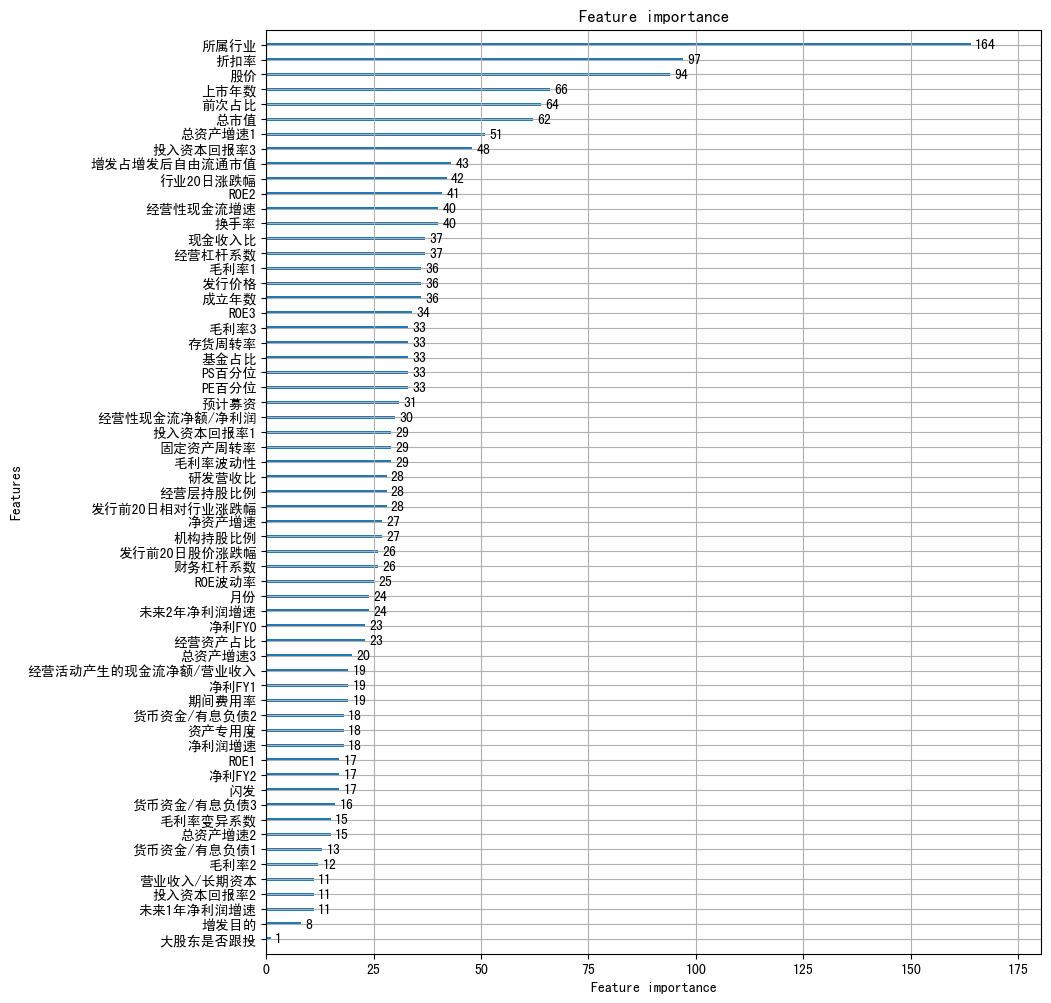

In [84]:
lgb.plot_importance(lgbreg, figsize=(10,12))

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

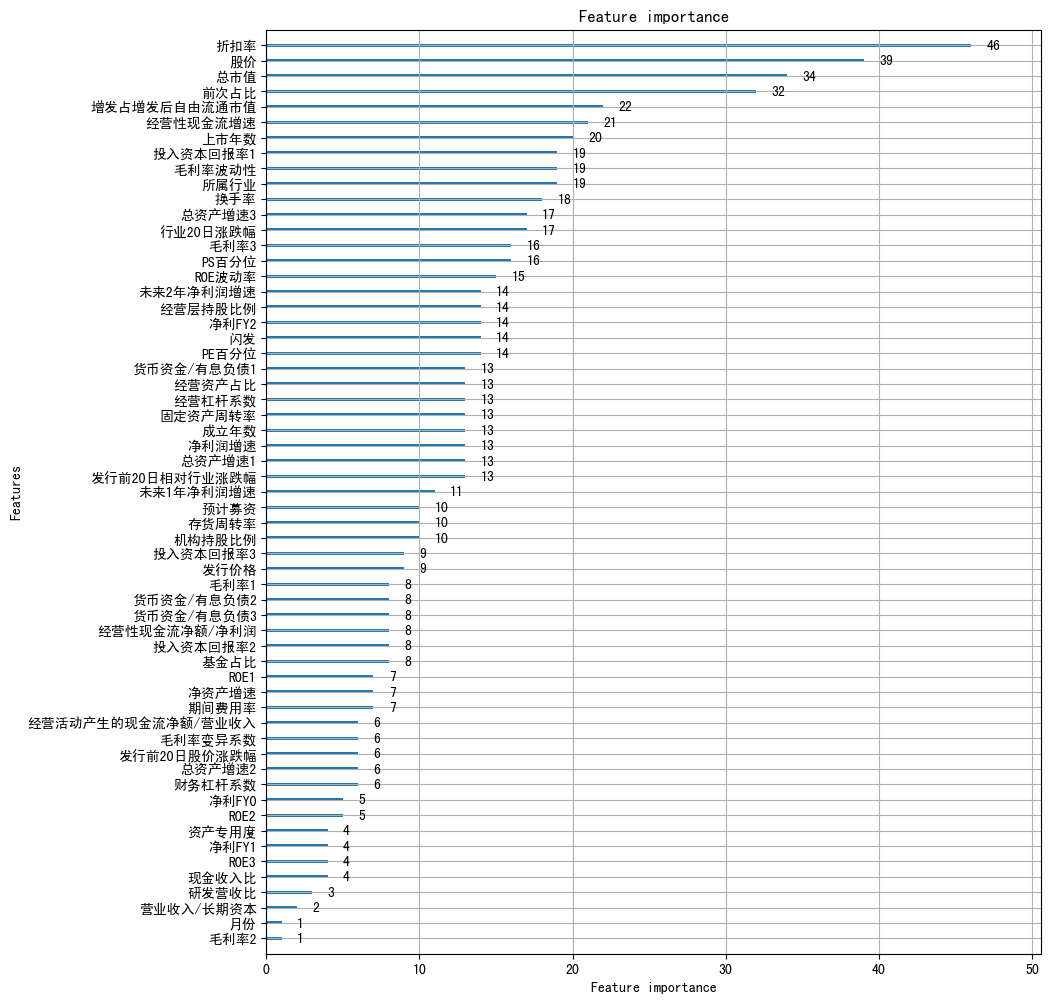

In [87]:
lgbclf = lgbpredict('/home/sam/job/dongyuan/', -1, False, False)
lgb.plot_importance(lgbclf, figsize=(10,12))

In [ ]:
# 统一归一折扣率
earn(dir_path, -1, read_pred, reg)

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(score)
plt.legend(labels=['tra','va','tea','trr','vr','ter'])

In [ ]:
score[18]

In [ ]:
[(i,score[i][0], score[i][1], score[i][2]) for i in range(10,20)]

In [49]:
def svmpredict(dir_path, num_factor=-1, reg=False):
    '''
    使用LightGBM模型基于2020年前数据对2020年后股票盈利概率计算
    
    
    params:
    
    dir_path: string 数据所在路径，含最后一个斜杠，文件夹中包括train_data.csv和test_data.csv两个清洗好的2020前数据和2020后数据
    num_factor: int 考虑的因子数量，-1使用所有因子
    read_pred：bool 读取预测结果
    reg: bool 使用回归还是二分类
    
    return:
    
    Tuple 包括训练、验证和预测集准确率，训练、验证和预测集召回率
    '''
    # 按相关性递减排序
    factor = ['股价', '折扣率', '前次占比', '总市值','发行价格', '增发占增发后自由流通市值', 'PS百分位', '基金占比', \
              '净利FY0', '总资产增速3','净利润增速', '净利FY2', '总资产增速1', '净资产增速', 'PE百分位', \
              '发行前20日股价涨跌幅', '净利FY1','预计募资', '行业20日涨跌幅', 'ROE', 'ROE1', '投入资本回报率1', \
              'ROE波动率', '研发营收比','发行前20日相对行业涨跌幅', '总资产增速2', '货币资金/有息负债3', '上市年数', \
              '毛利率3', '存货周转率','成立年数', '经营性现金流净额/净利润', '营业收入/长期资本', '投入资本回报率3', \
              '经营性现金流增速', 'ROE3','现金收入比', '财务杠杆系数', '经营活动产生的现金流净额/营业收入', \
              '货币资金/有息负债1', '期间费用率','未来1年净利润增速', '机构持股比例', '投入资本回报率2', '经营资产占比', \
              '毛利率1', '未来2年净利润增速','ROE2', '毛利率波动性', '资产专用度', '经营杠杆系数', '经营层持股比例', \
              '毛利率变异系数', '货币资金/有息负债2', '固定资产周转率', '闪发', '毛利率2', '换手率']
    '''
    # 按linear核重要性排序
    factor = ['股价', '净利FY1', 'PS百分位', '未来2年净利润增速', '前次占比', '总资产增速1', '预计募资', '固定资产周转率',\
              '投入资本回报率1', '毛利率2', '资产专用度', '换手率', '期间费用率', '货币资金/有息负债1', '货币资金/有息负债2',\
              '货币资金/有息负债3', '经营层持股比例', '投入资本回报率2', 'ROE', 'ROE1', '机构持股比例', '营业收入/长期资本',\
              '毛利率波动性', 'ROE2', '成立年数', '总资产增速3', '总资产增速2', '经营资产占比', '发行前20日相对行业涨跌幅',\
              '行业20日涨跌幅', '经营杠杆系数', '发行前20日股价涨跌幅', '研发营收比', '经营性现金流净额/净利润', '总市值',\
              '毛利率1', '上市年数', '净利润增速', '经营活动产生的现金流净额/营业收入', 'PE百分位', '财务杠杆系数','毛利率3',\
              '基金占比', '现金收入比', '闪发', '投入资本回报率3', '净利FY0', '毛利率变异系数', 'ROE波动率',\
              '增发占增发后自由流通市值', '净资产增速', '存货周转率', '未来1年净利润增速', 'ROE3', '经营性现金流增速', '折扣率',\
              '净利FY2','发行价格']
    '''
    #class_factor = ['大股东是否跟投', '月份']
    if num_factor == -1:
        pass
    else:
        factor = factor[:num_factor]
        #class_factor = list(set(factor).intersection(set(class_factor)))
    test_data = pd.read_csv(dir_path+'test_data.csv')
    test_data.drop_duplicates(inplace=True)
    train_data = pd.read_csv(dir_path+'train_data.csv')
    train_data.drop_duplicates(inplace=True)
    # 将2020年数据加入训练集
    #year = test_data['发行日期'].apply(lambda x:x[:4])
    #data_2020 = test_data[year == '2020']
    #test_data = test_data[year != '2020'].copy()
    #train_data = pd.concat([train_data, data_2020], axis=0)
    #train_data.index = range(len(train_data))
    mu = train_data['折扣率'].mean()
    sigma = train_data['折扣率'].std()
    train_data['折扣率'] = (train_data['折扣率'] - mu)/sigma
    test_data['折扣率'] = (test_data['折扣率'] - mu)/sigma
    #train_data['月份'] = train_data['发行月份'].apply(lambda x:x[-2:])
    #test_data['月份'] = test_data['发行月份'].apply(lambda x:x[-2:])
    #train_data = pd.get_dummies(train_data, columns=class_factor)
    #test_data = pd.get_dummies(test_data, columns=class_factor)
    #non_factor = ['代码', '名称', '发行日期', '发行对象', '所属行业', '解禁日绝对收益', '持有天数',\
    #              '年化收益', '发行月份', '归一年化收益', '盈利预测', '增发目的']
    #factor = list(train_data.columns)
    #for _ in non_factor:
    #   factor.remove(_)
    #print(factor)
    X_nontest = train_data[factor]
    X_test = test_data[factor]
    if reg:
        target='年化收益'
        y_nontest = train_data[target]
        y_test = test_data[target]
        X_train, X_valid, y_train, y_valid = train_test_split(X_nontest, y_nontest,test_size=0.1)
        svmreg = NuSVR(kernel='rbf')
        #svmreg = LinearSVR(loss='squared_epsilon_insensitive', dual=False, random_state=6)
        svmreg.fit(X_train, y_train, sample_weight=None)
        joblib.dump(svmreg, 'svmreg.pkl')
        y_pred_prob = svmreg.predict(X_train)
        y_pred = np.ones(y_pred_prob.shape)
        y_pred[np.where(y_pred_prob<0)]=0
        y_label = np.sign(y_train.values)
        y_label[np.where(y_label == -1)] = 0
        train_accuracy = accuracy_score(y_label, y_pred)
        train_recall = recall_score(y_label, y_pred)
        y_pred_prob = svmreg.predict(X_valid)
        y_pred = np.ones(y_pred_prob.shape)
        y_pred[np.where(y_pred_prob<0)]=0
        y_label = np.sign(y_valid.values)
        y_label[np.where(y_label == -1)] = 0
        valid_accuracy = accuracy_score(y_label, y_pred)
        valid_recall = recall_score(y_label, y_pred)
        y_pred_prob = svmreg.predict(X_test)
        y_pred = np.ones(y_pred_prob.shape)
        y_pred[np.where(y_pred_prob<0)]=0
        y_label = np.sign(y_test.values)
        y_label[np.where(y_label == -1)] = 0
        test_accuracy = accuracy_score(y_label, y_pred)
        test_recall = recall_score(y_label, y_pred)
    else:
        train_data['盈利']= train_data['年化收益'].apply(lambda x : 1 if x > 0 else 0)
        test_data['盈利']= test_data['年化收益'].apply(lambda x : 1 if x > 0 else 0)
        target = '盈利'
        y_nontest = train_data[target]
        y_test = test_data[target]
        X_train, X_valid, y_train, y_valid = train_test_split(X_nontest, y_nontest,test_size=0.1, random_state=6)
        # 样本权重
        train_weight = np.ones(y_train.shape)
        train_weight[np.where(y_train.values == 0)] = 0.9
        valid_weight = np.ones(y_valid.shape)
        valid_weight[np.where(y_valid.values == 0)] = 0.9
        #svmclf = NuSVC(kernel='rbf', degree=5, probability=True, random_state=6)
        svmclf = LinearSVC(dual=False, random_state=6)
        svmclf.fit(X_train, y_train, sample_weight=train_weight)
        joblib.dump(svmclf, 'svmclf.pkl')
        y_pred = svmclf.predict(X_train)
        y_label = y_train.values
        train_accuracy = accuracy_score(y_label, y_pred)
        train_recall = recall_score(y_label, y_pred)
        y_pred = svmclf.predict(X_valid)
        y_label = y_valid.values
        valid_accuracy = accuracy_score(y_label, y_pred)
        valid_recall = recall_score(y_label, y_pred)
        y_pred = svmclf.predict(X_test)
        y_label = y_test.values
        test_accuracy = accuracy_score(y_label, y_pred)
        test_recall = recall_score(y_label, y_pred)
    return train_accuracy, valid_accuracy, test_accuracy, train_recall, valid_recall, test_recall

In [50]:
svmpredict('/home/sam/job/dongyuan/', -1, True)

(0.782824112303881,
 0.6148148148148148,
 0.6276595744680851,
 0.9246987951807228,
 0.8472222222222222,
 0.8341232227488151)

In [52]:
score = []
for i in range(1,59):
    score.append(svmpredict('/home/sam/job/dongyuan/', i, True))

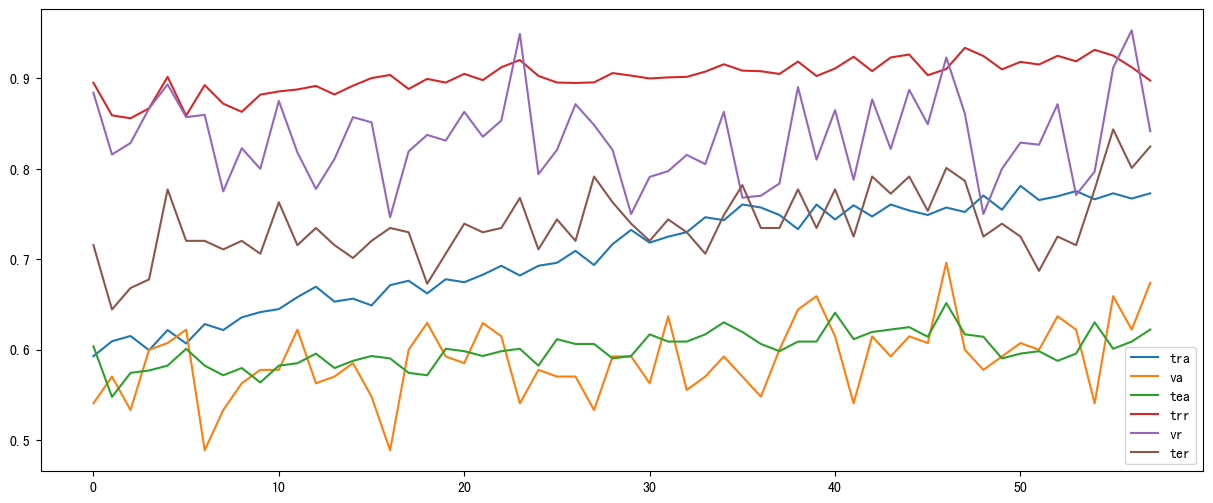

In [53]:
plt.figure(figsize=(15,6))
plt.plot(score) 
plt.legend(labels=['tra','va','tea','trr','vr','ter'])

In [64]:
[(i, score[i][0], score[i][1], score[i][2]) for i in range(45,47)]

[(45, 0.7489677952105698, 0.6074074074074074, 0.6143617021276596),
 (46, 0.7572254335260116, 0.6962962962962963, 0.651595744680851)]

In [ ]:
def auto_value(market_data, train_pred, test_pred, start, end, threshold=0.5, reg=False):
    pred = test_pred.copy()
    if reg:
        result = '预测年化收益'
        threshold = threshold/10
    else:
        result = '盈利概率'
    prob_distribution = list((pred[result].sort_values(ascending=True)).values)
    pred.index = range(len(pred))
    
    start = dt.strptime(start, '%Y-%m-%d')
    end = dt.strptime(end, '%Y-%m-%d')
    pred['发行日期'] = pd.to_datetime(pred['发行日期'])
    life = pred[(pred['发行日期'] >= start) & (pred['发行日期'] <= end)]
    T = (end-start).days
    T_total = (pred.iloc[-1]['发行日期'] - pred.iloc[0]['发行日期']).days
    winner = pred[pred[result]> threshold]
    N = winner.shape[0]
    mean_share_num = N * T/T_total
    progress = 0
    weight = []
    code = []
    date = []
    for i in life.index:
        s = life.loc[i]
        p = s[result]
        if p > threshold:
            today = s['发行日期']
            t = (today - start).days
            rank = bisect.bisect(prob_distribution, p)
            prior = 2*rank/N
            lag = t/T-progress
            if lag > 0:
                w = lag * prior
            else:
                w = prior / mean_share_num
            if progress + w > 1.0:
                w = 1.0 - progress
                progress += w
                weight.append(w)
                code.append(s['代码'])
                date.append(s['发行日期'])
                break
            w = 0.2 if w > 0.2 else w
            w = 0.05 if w < 0.05 else w
            progress += w
            weight.append(w)
            code.append(s['代码'])
            date.append(s['发行日期'])
        else:
            continue
    if len(code) == 0:
        return 0
    else:
        r = []
        for c, d in zip(code, date):
            m = life[(life['代码'] == c) & (life['发行日期'] == d)]
            r.append(m['年化收益'].values[0])
        return np.dot(np.array(weight), np.array(r))

def value_comp(name, market_data, product_data, train_pred, test_pred, threshold, reg):
    collection = product_data[product_data[name].notna()]
    if collection.empty:
        return 
    start = collection.iloc[0]['发行日期']
    end = collection.iloc[-1]['发行日期']
    # 选股收益
    model = auto_value(market_data, train_pred, test_pred, start, end, threshold)
    # 产品收益
    product = (collection['年化收益']*collection[name+'权重']).sum()
    # 市场收益
    mk = market_data[(market_data['发行日期'] > start) & (market_data['发行日期'] < end)]
    market = mk['年化收益'].mean()
    return model, product, market

def value_comp_all(PRODUCT_NAME, dir_path, read_pred, thresdhold, reg):
    product_data = pd.read_csv(dir_path+'product_data.csv')
    market_data = pd.read_csv(dir_path+'market_data.csv')
    # 产品数据解禁日在2022年11月16日后解禁日收益为股价浮盈
    #now = dt(2022,11,16)
    #market_data['首批限售股份解禁日'] = market_data['首批限售股份解禁日'].apply(lambda x:dt.strptime(x, '%Y-%m-%d'))
    #market_data = market_data[market_data['首批限售股份解禁日'] < now]
    #product_data['解禁日期'] = pd.to_datetime(product_data['解禁日期'])
    #product_data = product_data[product_data['解禁日期'] < now]
    train_pred, test_pred = earn(dir_path, read_pred, reg)
    return_record = []
    for name in PRODUCT_NAME:
        model, product, market = value_comp(name, market_data, product_data, train_pred, test_pred, threshold, reg)
        return_record.append((model, product, market))
    plt.figure(figsize=(15, 6))
    model = [x[0] for x in return_record]
    product = [x[1] for x in return_record]
    market = [x[2] for x in return_record]
    plt.plot(PRODUCT_NAME, model)
    plt.plot(PRODUCT_NAME, product)
    plt.plot(PRODUCT_NAME, market)
    plt.title('模型、产品与市场年化收益率')
    plt.legend(('模型', '产品', '市场'), loc='best')
    plt.xticks(rotation=50)
    plt.show()

In [ ]:
dir_path = '/home/sam/job/dongyuan/'
threshold=0.5
read_pred=False
reg = False

In [ ]:
value_comp_all(PRODUCT_NAME, dir_path, read_pred, threshold, reg)

In [ ]:
def time_filter(market_data, idx, mode='mean', period='month'):
    origin = pd.to_datetime(market_data.loc[idx]['发行日期'])
    if period == 'month':
        T = pd.Timedelta(value=30, unit='day')
    else:
        T = pd.Timedelta(value=7, unit='day')
    interval = market_data.loc[idx-40:idx]
    cond = (origin - pd.to_datetime(interval['发行日期'])) < T
    if mode == 'mean':
        return interval[cond]['解禁日收益率'].mean()
    else:
        return interval[cond]['解禁日收益率'].sample(frac=2.0, replace=True).mean()
    
def time_prob_filter(market_data, prob, idx, threshold=0, mode='mean', period='month'):
    origin = pd.to_datetime(market_data.loc[idx]['发行日期'])
    if period == 'month':
        T = pd.Timedelta(value=30, unit='day')
    else:
        T = pd.Timedelta(value=7, unit='day')
    interval = market_data.loc[idx-40:idx]
    cond = (origin - pd.to_datetime(interval['发行日期'])) < T
    candi = interval[cond].copy()
    if threshold:
        candi_prob = []
        for i in candi.index:
            try:
                candi_prob.append(prob[prob['代码'] == candi.loc[i]['代码'] & prob['发行日期'] == candi.loc[i]['发行日期']]['盈利概率'].iloc[0])
            except:
                candi_prob.append(0.0)
        candi['盈利概率'] = candi_prob
        #num = int((1-threshold)*len(candi))
        #candi.sort_values(by=['盈利概率'], ascending=False, inplace=True)
        #candi = candi.iloc[:num+1]
        candi = candi[candi['盈利概率'] > threshold]
    if candi.empty: candi = market_data.loc[idx].copy()
    if mode == 'mean':
        return candi['解禁日收益率'].mean()
    else:
        return candi['解禁日收益率'].sample(frac=3.0, replace=True).mean()
    
def plot_value(product='', model_value=None, product_value=None, market_value=None):
    plt.figure(figsize=(14,4))
    data = {'模型':model_value, '产品':product_value, '市场':market_value}
    df = pd.concat(data, axis=1)
    #print(df)
    sns.lineplot(df, markers=True)
    plt.title(product)
    plt.show()

In [ ]:
def model_market(market_data_path, prob, threshold=0.5, mode='mean', weight=True, period='month'):
    
    '''
    模型选股、市场对比
    
    
    params:
    
    market_data_path: string 市场数据所在文件夹路径
    prob: DataFrame 模型选股集合，索引为股票代码，列包括股票发行日期、发行月份、盈利概率，按概率递减排名
    threshold: float 模型选择概率阈值
    mode: string 取值为'mean‘表示用均值作为收益率，或’mc'表示随机选取单票收益作为收益率
    weight: bool True表示对市场和模型选股使用权重
    period: string 向前取的单票时间范围， 取值为'month'或'week'
    
    return:
    
    win_rate： float 模型对市场胜率
    selection_value: DataFrame 模型选股按月计算收益率
    market_value: DataFrame 市场按月计算收益率
    '''
    market_data = pd.read_csv(market_data_path+'market_data.csv')
    # 给市场添加’发行月份‘与’解禁日收益率‘两列
    market_data['发行月份'] = market_data['发行日期'].apply(lambda x:x[:-3])
    market_data['解禁日收益率'] = market_data['解禁日浮盈'].apply(lambda x:float(x[:-1])/100)
    # 模型选股
    #selection = prob.iloc[:int(prob.shape[0]*threshold)].copy()
    selection = prob[prob['盈利概率'] > threshold].copy()
    # 选股权重
    if weight:
        selection['权重'] = selection['盈利概率'] / selection['盈利概率'].sum()
    else:
        selection['权重'] = 1 / selection.shape[0]
    # 选股解禁日加权收益
    # selection 没有收益率，需要在市场数据中找
    share_idx_list = []
    for idx in selection.index:
        share = selection.loc[idx]
        code = share['代码']
        month = share['发行月份']
        cond1 = (market_data['代码'] == code) & (market_data['发行月份'] == month)
        try:
            share_idx_list.append(market_data[cond1].index[0])
        except:
            share_idx_list.append(market_data[market_data['发行月份'] == '2022-11'].sample(n=1).index[0])
    selection['解禁日收益率'] = market_data.loc[share_idx_list]['解禁日收益率'].values
    selection['解禁日加权收益率'] = selection['解禁日收益率'] * selection['权重']
    # 按月收益率
    selection['发行月份'] = selection['发行月份'].astype('string')
    selection_return = selection.groupby('发行月份')['解禁日加权收益率'].sum()
    selection_value = 1 + selection_return.cumsum(axis=0)
    
    # 同时期同权重市场累计收益率
    return_list = []
    # mean模式就算前40个单票中1个月内的票平均收益率，mc模式从前40个票1个月内票有放回的选择全部单票数量并计算平均收益率
    for idx in share_idx_list:
        if idx <= 40:
            return_list.append(market_data.loc[idx]['解禁日收益率'])
        else:
            return_list.append(time_filter(market_data, idx, mode, period))

    market_return = pd.DataFrame({'发行月份':selection['发行月份'], '解禁日收益率':return_list})
    # 市场收益加权
    if weight:
        data = market_return['解禁日收益率'].values*selection['权重'].values
        market_return['解禁日加权收益率'] = pd.Series(data, index=market_return.index)
    else:
        market_return['解禁日加权收益率'] = market_return['解禁日收益率'] / market_return.shape[0]
        
    market_return['发行月份'] = market_return['发行月份'].astype('string')
    market_rolling_return = market_return.groupby('发行月份')['解禁日加权收益率'].sum()
    market_value = 1 + market_rolling_return.cumsum(axis=0)
    # 画图
    plot_value(selection_value, market_value)

In [ ]:
def model_product(product, product_data_path, market_data_path, prob, threshold=0.5,\
                  mode='mean', weight=True, period='month'):
    
    '''
    模型选股、产品对比
    
    
    params:
    
    product: string 产品名
    product_data_path：string 产品数据所在文件夹
    market_data_path: string 市场数据所在文件夹路径
    prob: DataFrame 模型选股集合，索引为股票代码，列包括股票发行日期、发行月份、盈利概率，按概率递减排名
    threshold: float 模型选择概率比例
    mode: string 取值为'mean‘表示用均值作为收益率，或’mc'表示随机选取单票收益作为收益率
    weight: bool True表示对市场和模型选股使用权重
    period: string 向前取的单票时间范围， 取值为'month'或'week'
    
    return:
    
    win_rate： float 模型对市场胜率
    model_value: DataFrame 模型选股按月计算收益率
    product_value: DataFrame 市场按月计算收益率
    '''
    
    market_data = pd.read_csv(market_data_path+'market_data.csv')
    # 给市场添加’发行月份‘与’解禁日收益率‘两列
    market_data['发行月份'] = market_data['发行日期'].apply(lambda x:x[:-3])
    market_data['解禁日收益率'] = market_data['解禁日浮盈'].apply(lambda x:float(x[:-1])/100)
    
    product_data = pd.read_csv(product_data_path+'product_data.csv')
    share_collection = product_data[product_data[product].notna()].copy()
    share_collection['发行日期'] = share_collection['发行日期'].astype(np.string_)
    share_collection['发行日期'] = share_collection['发行日期'].apply(lambda x:x.decode('UTF-8'))
    share_collection['发行月份'] = share_collection['发行日期'].apply(lambda x:x[:-3])
    share_collection['解禁日加权收益'] = share_collection['解禁日收益率']*share_collection[product+'权重']
    product_return = share_collection.groupby(['发行月份'])['解禁日加权收益'].sum()
    product_value = 1 + product_return.cumsum(axis=0)
     
    share_idx_list = []
    for idx in share_collection.index:
        share = share_collection.loc[idx]
        code = share['代码']
        month = share['发行月份']
        cond1 = (market_data['代码'] == code) & (market_data['发行月份'] == month)
        cond2 = market_data['发行月份'] == month
        try:
            share_idx_list.append(market_data[cond1].index[0])
        except:
            share_idx_list.append(market_data[market_data['发行月份'] == '2022-11'].sample(n=1).index[0])

    return_list = []
    # mean模式就算前40个单票中1个月内的票平均收益率，mc模式从前40个票1个月内票有放回的选择全部单票数量并计算平均收益率
    for idx in share_idx_list:
        if idx <= 40:
            return_list.append(market_data.loc[idx]['解禁日收益率'])
        else:
            return_list.append(time_prob_filter(market_data, prob, idx, threshold, mode, period))

    model_return = pd.DataFrame({'发行月份':market_data.loc[share_idx_list]['发行月份'], \
                                 '解禁日收益率':return_list})

    # 考虑产品投资单票权重2
    if weight:
        data = model_return['解禁日收益率'].values*share_collection[product+'权重'].values
        model_return['解禁日加权收益率'] = pd.Series(data, index=model_return.index)
    else:
        model_return['解禁日加权收益率'] = model_return['解禁日收益率']/model_return.shape[0]

    model_rolling_return = model_return.groupby('发行月份')['解禁日加权收益率'].sum()
    model_value = 1 + model_rolling_return.cumsum(axis=0)
    # 画图
    plot_value(model_value, product_value)

In [ ]:
def model_product_market(product, product_data_path, market_data_path, prob,\
                         threshold=0, mode='mean', weight=True, period='month'):
    '''
    模型选股、产品、市场对比
    
    
    params:
    
    product: string 产品名
    product_data_path：string 产品数据所在文件夹
    market_data_path: string 市场数据所在文件夹路径
    prob: DataFrame 模型选股集合，索引为股票代码，列包括股票发行日期、发行月份、盈利概率，按概率递减排名
    threshold: float 模型选择概率比例
    mode: string 取值为'mean‘表示用均值作为收益率，或’mc'表示随机选取单票收益作为收益率
    weight: bool True表示对市场和模型选股使用权重
    period: string 向前取的单票时间范围， 取值为'month'或'week'
    
    return:
    
    win_rate：float 模型对市场胜率
    selection_value: DataFrame 模型选股按月计算收益率
    product_value: DataFrame 产品按月计算收益率
    market_value: DataFrame 市场按月计算收益率
    '''
    
    market_data = pd.read_csv(market_data_path+'market_data.csv')
    # 给市场添加’发行月份‘与’解禁日收益率‘两列
    market_data['发行月份'] = market_data['发行日期'].apply(lambda x:x[:-3])
    market_data['解禁日收益率'] = market_data['解禁日浮盈'].apply(lambda x:float(x[:-1])/100)
    
    product_data = pd.read_csv(product_data_path+'product_data.csv')
    share_collection = product_data[product_data[product].notna()].copy()
    share_collection['发行日期'] = share_collection['发行日期'].astype(np.string_)
    share_collection['发行日期'] = share_collection['发行日期'].apply(lambda x:x.decode('UTF-8'))
    share_collection['发行月份'] = share_collection['发行日期'].apply(lambda x:x[:-3])
    share_collection['解禁日加权收益'] = share_collection['解禁日收益率']*share_collection[product+'权重']
    product_return = share_collection.groupby(['发行月份'])['解禁日加权收益'].sum()
    product_value = 1 + product_return.cumsum(axis=0)
    
    # 模型表现
    share_idx_list = []
    for idx in share_collection.index:
        share = share_collection.loc[idx]
        code = share['代码']
        month = share['发行月份']
        cond1 = (market_data['代码'] == code) & (market_data['发行月份'] == month)
        cond2 = market_data['发行月份'] == month
        try:
            share_idx_list.append(market_data[cond1].index[0])
        except:
            share_idx_list.append(market_data[market_data['发行月份'] == '2022-11'].sample(n=1).index[0])

    return_list = []
    # mean模式就算前40个单票中1个月内的票平均收益率，mc模式从前40个票1个月内票有放回的选择全部单票数量并计算平均收益率
    for idx in share_idx_list:
        if idx <= 40:
            return_list.append(market_data.loc[idx]['解禁日收益率'])
        else:
            return_list.append(time_prob_filter(market_data, prob, idx, threshold, mode, period))

    model_return = pd.DataFrame({'发行月份':market_data.loc[share_idx_list]['发行月份'], \
                                 '解禁日收益率':return_list})

    # 考虑产品投资单票权重2
    if weight:
        data = model_return['解禁日收益率'].values*share_collection[product+'权重'].values
        model_return['解禁日加权收益率'] = pd.Series(data, index=model_return.index)
    else:
        model_return['解禁日加权收益率'] = model_return['解禁日收益率']/model_return.shape[0]

    model_rolling_return = model_return.groupby('发行月份').sum()
    model_value = 1 + model_rolling_return.cumsum(axis=0)['解禁日加权收益率']
    
    # 市场表现
    return_list = []
    # mean模式就算前40个单票中1个月内的票平均收益率，mc模式从前40个票1个月内票有放回的选择全部单票数量并计算平均收益率
    for idx in share_idx_list:
        if idx <= 40:
            return_list.append(market_data.loc[idx]['解禁日收益率'])
        else:
            return_list.append(time_filter(market_data, idx, mode, period))

    market_return = pd.DataFrame({'发行月份':market_data.loc[share_idx_list]['发行月份'], \
                                 '解禁日收益率':return_list})

    # 考虑产品投资单票权重
    if weight:
        data = market_return['解禁日收益率'].values*share_collection[product+'权重'].values
        market_return['解禁日加权收益率'] = pd.Series(data, index=market_return.index)
    else:
        market_return['解禁日加权收益率'] = market_return['解禁日收益率']/market_return.shape[0]

    market_rolling_return = market_return.groupby('发行月份')['解禁日加权收益率'].sum()
    market_value = 1 + market_rolling_return.cumsum(axis=0)
    if market_value.shape != product_value.shape:
        product_value.drop(labels=['2022-12'], inplace=True)
    # 画图
    #print(model_value, product_value, market_value)
    plot_value(product, model_value, product_value, market_value)